In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets 
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
housing_data = datasets.load_boston()

In [3]:
X, Y = shuffle(housing_data.data, housing_data.target, random_state=7)

In [4]:
num_training = int(0.8 * len(X))
X_train, Y_train = X[:num_training], Y[:num_training]
X_test, Y_test = X[num_training:], Y[num_training:]

In [5]:
dt_regressor = DecisionTreeRegressor(max_depth=4)
dt_regressor.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [6]:
ab_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=400, random_state=7)
ab_regressor.fit(X_train, Y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=400,
         random_state=7)

In [7]:
y_pred_dt = dt_regressor.predict(X_test)
mse = mean_squared_error(Y_test, y_pred_dt)
evs = explained_variance_score(Y_test, y_pred_dt)

print("Decision Tree Performance")
print("\nMean squared error = ", round(mse, 2))
print("\nExplained variance score = ", round(evs, 2))

Decision Tree Performance

Mean squared error =  14.79

Explained variance score =  0.82


In [10]:
y_pred_ab = ab_regressor.predict(X_test)
mse = mean_squared_error(Y_test, y_pred_ab)
evs = explained_variance_score(Y_test, y_pred_ab)

print("AdaBoost Performance")
print("\nMean squared error = ", round(mse, 2))
print("\nExplained variance score = ", round(evs, 2))

AdaBoost Performance

Mean squared error =  7.64

Explained variance score =  0.91


## Computing the Relative Importance of Features

In [20]:
def plot_features_importances(features_importances, title, features_name):
    # Normalise the importance values
    features_importances = 100.0 * (features_importances / max(features_importances))
    
    # Sort the index values and flip them so that they are arranged in decreasing order of importance
    index_sorted = np.flipud(np.argsort(features_importances))
    
    # Center the location of the labels on the X-axis (for display purposes only)
    pos = np.arange(index_sorted.shape[0]) + 0.5
    
    # Plot the bar graph
    plt.figure()
    plt.bar(pos, features_importances[index_sorted], align='center')
    plt.xticks(pos, features_name[index_sorted])
    plt.ylabel('Relative Importane')
    plt.title(title)
    plt.show()

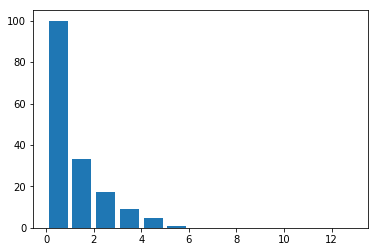

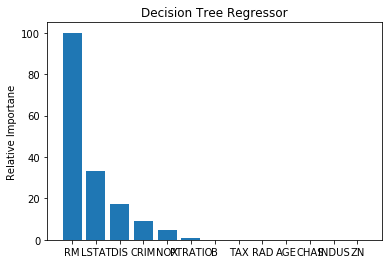

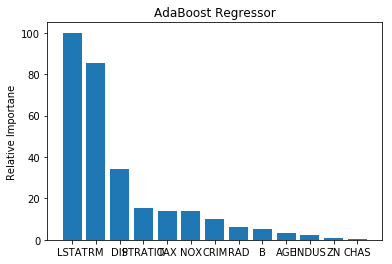

In [21]:
plot_features_importances(dt_regressor.feature_importances_,
                         'Decision Tree Regressor', housing_data.feature_names)
plot_features_importances(ab_regressor.feature_importances_,
                         'AdaBoost Regressor', housing_data.feature_names)